# Classification

Project for the Master of Information and Data Science Program at the Berkeley School of Information.

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
    ## STUDENT START ###
    n = 5
    for i in range(n):
        print('Label: '+ newsgroups_train.target_names[train_labels[i]])
        print('Text: ')
        print()
        print(train_data[i])
        print()
        print()
        print()
        print()
    ## STUDENT END ###

P1(5)

Label: comp.graphics
Text: 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych




Label: talk.religion.misc
Text: 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centu

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [5]:
def P2():
    ## STUDENT START ###
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    
    print('1.')
    print('Total vocabulary size: '+ str(len(vectorizer.get_feature_names())))
    numzero = []
    nonzeros = []
    totals = []
    for i in X:
        if i.nnz != 0:
            numzero.append(i.nnz)
    avgnonzero = sum(numzero)/X.shape[0]
    fracnonzero = X.nnz / (X.shape[0]*X.shape[1])
    print('Average number of non-zero features per example: ' + str(avgnonzero))
    print('Fraction of non-zero features in the matrix: ' + str(fracnonzero))
    print('0th feature string: ' + vectorizer.get_feature_names()[0])
    print('Last feature string: ' + vectorizer.get_feature_names()[-1])
    print()
    print()
    print()
    
    
    print('2.')
    corpus = ["atheism", "graphics", "space", "religion"]
    vocab = {'atheism':0, 'graphics':1, 'space':2, 'religion':3}
    vectorizer = CountVectorizer(vocabulary=vocab)
    X = vectorizer.fit_transform(train_data)
    print('Vocabulary: ' + str(vectorizer.get_feature_names()))
    print('Vocabulary length: '+ str(len(vectorizer.get_feature_names())))
    numzero = []
    nonzeros = []
    totals = []
    for i in X:
        if i.nnz != 0:
            numzero.append(i.nnz)
    avgnonzero = sum(numzero)/X.shape[0]
    fracnonzero = X.nnz / (X.shape[0]*X.shape[1])
    print('Average number of non-zero features per example: ' + str(avgnonzero))
    print()
    print()
    print()
    
    
    
    
    print('3.')
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3))
    X = vectorizer.fit_transform(train_data)
    print('Total vocabulary size of \'char\' bigram and trigram vectorization: '+ str(len(vectorizer.get_feature_names())))
    print()
    print()
    print()
    
    
    
    
    print('4.')
    vectorizer = CountVectorizer(min_df=10)
    X = vectorizer.fit_transform(train_data)
    print('Total vocabulary size after pruning words in fewer than 10 documents: '+ str(len(vectorizer.get_feature_names())))
    print()
    print()
    print()
    
    
    
    
    print('5.')
    trainvectorizer = CountVectorizer()
    trainX = trainvectorizer.fit_transform(train_data)
    devvectorizer = CountVectorizer()
    devX = devvectorizer.fit_transform(dev_data)
    devvocab = devvectorizer.get_feature_names()
    trainvocab = trainvectorizer.get_feature_names()
    missingvocab = set(devvocab).difference(trainvocab)
    frac = len(missingvocab)/len(devvocab)

    print('Fraction of words in the development vocabulary missing from the training vocabulary: '+ str(frac))
    
    ## STUDENT END ###

P2()

1.
Total vocabulary size: 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of non-zero features in the matrix: 0.0035978272269590263
0th feature string: 00
Last feature string: zyxel



2.
Vocabulary: ['atheism', 'graphics', 'space', 'religion']
Vocabulary length: 4
Average number of non-zero features per example: 0.26843657817109146



3.
Total vocabulary size of 'char' bigram and trigram vectorization: 35478



4.
Total vocabulary size after pruning words in fewer than 10 documents: 3064



5.
Fraction of words in the development vocabulary missing from the training vocabulary: 0.24787640034470024


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

K-Nearest-Neighbors:
1-Nearest-Neighbor F1 Score: 0.38576918749596
41-Nearest-Neighbor F1 Score: 0.46574156186516713
81-Nearest-Neighbor F1 Score: 0.4619373799003221
121-Nearest-Neighbor F1 Score: 0.4788367928572687
161-Nearest-Neighbor F1 Score: 0.46091756763727026
201-Nearest-Neighbor F1 Score: 0.4871524010854814
241-Nearest-Neighbor F1 Score: 0.46502937916649517
281-Nearest-Neighbor F1 Score: 0.4600512925919862
321-Nearest-Neighbor F1 Score: 0.4558908873071888
361-Nearest-Neighbor F1 Score: 0.44502943723008825
401-Nearest-Neighbor F1 Score: 0.4551968223818329
441-Nearest-Neighbor F1 Score: 0.45112314802433673
481-Nearest-Neighbor F1 Score: 0.44799059822331905
521-Nearest-Neighbor F1 Score: 0.4507962383069404
561-Nearest-Neighbor F1 Score: 0.4459292986597752
601-Nearest-Neighbor F1 Score: 0.4376612280292652
641-Nearest-Neighbor F1 Score: 0.4377423697356078
Best K for K-Nearest-Neighbors: {'n_neighbors': 7}
Best score for K-Nearest-Neighbors {'n_neighbors': 7}: 0.43961121728313285


M

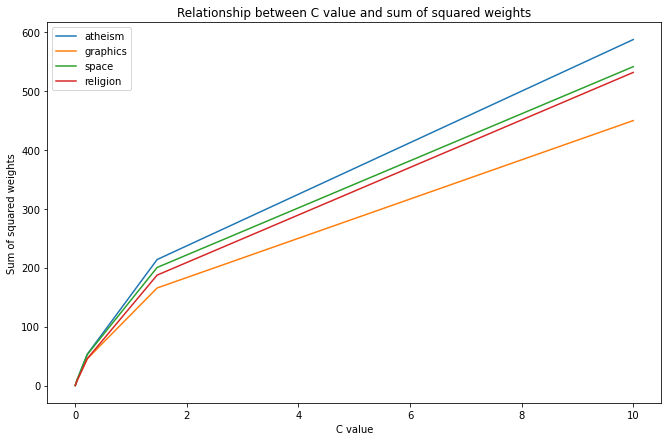

In [11]:
def P3():
    ## STUDENT START ###
    
# K-neighbors

    from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

    print('K-Nearest-Neighbors:')

    vectorizer = CountVectorizer()
    vectorizer.fit(train_data)

    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)

    klist = list(range(1, len(dev_data), 40))

    for i in range(len(klist)):
        kn = KNeighborsClassifier(n_neighbors = klist[i])
        kn.fit(train_matrix,train_labels)
        pred = kn.predict(dev_matrix)
        print(str(klist[i])+'-Nearest-Neighbor F1 Score: ' + str(metrics.f1_score(pred, dev_labels, average="weighted")))

    num = range(1, len(dev_data), 2)                                         
    num_neighbors = {'n_neighbors': num}                                      
    kn = KNeighborsClassifier()
    clf = GridSearchCV(kn, num_neighbors, scoring = 'f1_weighted')                  
    clf.fit(train_matrix, train_labels)
    print('Best K for K-Nearest-Neighbors: ' + str(clf.best_params_))
    print('Best score for K-Nearest-Neighbors '+ str(clf.best_params_)+': ' + str(clf.best_score_))
    print()
    print()

    
    # Naive Bayes:

    # alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    alpha_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    for i in range(len(alpha_list)):
        mult_NB = MultinomialNB(alpha=alpha_list[i])
        mult_NB.fit(train_matrix, train_labels)
        pred = mult_NB.predict(dev_matrix)
        print('Multinomial Naive Bayes (alpha of '+ str(alpha_list[i])+') F1 Score On Dev Set: ' + str(metrics.f1_score(pred, dev_labels, average="weighted")))

    nums = np.geomspace(0.0000001, 10.0, num=500)
    alphas = {'alpha': list(nums)}

    mult_NB = MultinomialNB()
    clf = GridSearchCV(mult_NB, alphas, scoring = 'f1_weighted')
    clf.fit(train_matrix, train_labels)


    print('Best alpha for Multinomial Naive Bayes: ' + str(clf.best_params_))
    print('Best score for Multinomial Naive Bayes: '+ str(clf.best_params_)+': ' + str(clf.best_score_))
    print()
    print()


#     Logistic Regression

    # alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    nums = np.geomspace(0.0001, 10.0, num=7)
    alpha_list = list(nums)
    ath = []
    gra = []
    spa = []
    rel = []
    cat_list = [ath, gra,spa,rel]
    for i in range(len(alpha_list)):
        logr = LogisticRegression(C=alpha_list[i], solver="liblinear", multi_class="auto")
        logr.fit(train_matrix, train_labels)
        pred = logr.predict(dev_matrix)

        coefs = logr.coef_
        coefs_sqr_sum = [sum(p) for p in coefs**2]
        labels = ['atheism','graphics','space','religion']
        labeled_coefs = []
        for j in range(len(coefs_sqr_sum)):
            newlabel = labels[j]+': '+str(coefs_sqr_sum[j])
            cat_list[j].append(coefs_sqr_sum[j])
            labeled_coefs.append(newlabel)
        print('Logistic Regression Model Using C Value of '+ str(alpha_list[i])+':')
        print('\t F1 Score: ' + str(metrics.f1_score(pred, dev_labels, average="weighted")))
        print('\t Sum of Squared Coefficient Weights: ')
        print('\t'+ str(labeled_coefs))
        print()
        
    
    

    nums = np.geomspace(0.0001, 10.0, num=100)
    alphas = {'C': list(nums)}

    logr = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class='auto', max_iter=1000)
    clf = GridSearchCV(logr, alphas, scoring = 'f1_weighted')
    clf.fit(train_matrix, train_labels)

    coefs = clf.best_estimator_.coef_
    coefs_sqr_sum = [sum(i) for i in coefs**2]
    labels = ['atheism','graphics','space','religion']
    labeled_coefs = []
    for i in range(len(coefs_sqr_sum)):
        newlabel = labels[i]+': '+str(coefs_sqr_sum[i])
        labeled_coefs.append(newlabel)
        

    c = clf.best_params_['C']
    print('Best C for Logistic Regression: '+str(c))
    print('Best score for Logistic Regression (using C of '+str(c)+'): '+str(clf.best_score_))
    print('Sum of squared coefficient weights for Logistic Regression (using C of '+str(c)+'): ')
    print('\t'+str(labeled_coefs))
    print()
    print()
    
    
    fig, ax = plt.subplots(figsize=(11,7))
    
    for i in range(len(cat_list)):
        ax.plot(alpha_list, cat_list[i], label = labels[i])
        
    ax.set_xlabel('C value')
    ax.set_ylabel('Sum of squared weights')
    ax.set_title('Relationship between C value and sum of squared weights')
    plt.legend()
    plt.show()
    
    
    ## STUDENT END ###

P3()

ANSWER:

* k-Nearest Neighbors performs less well when given a lot of features, especially sparse features.  K-Nearest-Neighbors tries to find the distances between features, but this approach is less useful when we treat each word as a feature.  A lot of words are very common ('a','the','is', etc) and are really meaningless when it comes to identifying topics, while a lot of words are very uncommon and may only be used once or twice in the entire corpus, making them also nearly meaningless when we try to compare words.  Also, a lot of words/features that are present in the dev set and are not present in the train set, and since k-Nearest-Neighbors have nothing to compare those words/features to, it can't perform well for those words/features.
* Logistic regression tries to find a specific relationship between features, while Naive Bayes assumes an independence of features.  For text, there are so many features that may or may not be correlated that it could end up confusing the classifier.  For example, words like ('a','the','is', etc) are ubiquitous in comparison to more class-relevant words like ('God' or 'lunar' or 'format').  It is easier for Naive Bayes to independently weigh the importance of the class-relevant words in comparison to logistic regression.
* Logistic regression's sum of squared weights increases as the C value increases.  A greater C value results in less regularization, which allows the weights to increase in value.  A smaller C value results in smaller weights, which results in a smaller sum of squared weights.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [14]:
def P4():
    ## STUDENT START ###

    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
    vectorizer.fit(train_data)
    bigram_train_matrix = vectorizer.transform(train_data)
    logr = LogisticRegression(penalty = 'l2',C=0.5, solver="liblinear", multi_class="auto")
    logr.fit(bigram_train_matrix, train_labels)

    coefs = logr.coef_
    labels = ['atheism','graphics','space','religion']

    import pandas as pd

    df = pd.DataFrame(coefs).T
    df.index = vectorizer.get_feature_names()
    df.columns = labels
    
    ath = df.sort_values('atheism', ascending=False).head()
    gra = df.sort_values('graphics', ascending=False).head()
    spa = df.sort_values('space', ascending=False).head()
    rel = df.sort_values('religion', ascending=False).head()
    
    table_df = pd.concat([ath, gra, spa, rel])

    print(table_df)


    ## STUDENT END ###

P4()

                atheism  graphics     space  religion
claim that     0.605549 -0.199054 -0.274355 -0.140364
cheers kent    0.555720 -0.697918 -0.663773  0.534808
was just       0.482050 -0.131432 -0.128896 -0.227466
you are        0.472740 -0.279888 -0.481324  0.028371
are you        0.446953 -0.248261 -0.097147 -0.305623
looking for   -0.630341  1.108348 -0.499971 -0.571862
in advance    -0.459351  0.832563 -0.438511 -0.418455
comp graphics -0.292166  0.801217 -0.370896 -0.285185
out there     -0.274803  0.758678 -0.479071 -0.277089
is there      -0.340882  0.754978 -0.468261 -0.257092
the space     -0.268187 -0.530107  0.871092 -0.273839
the moon      -0.350563 -0.492601  0.831048 -0.213799
sci space     -0.258008 -0.329148  0.621087 -0.221247
and such      -0.204269 -0.337506  0.590519 -0.218200
it was        -0.203029 -0.309682  0.525398 -0.313559
the fbi       -0.131974 -0.211356 -0.295292  0.551993
cheers kent    0.555720 -0.697918 -0.663773  0.534808
ignorance is  -0.158011 -0.1

ANSWER: I was surprised to see some very non-specific phrases in this table.  Bigrams like 'it was', 'are you', 'you are', 'but he' all consist of very common words (stop words), and I was surprised to see those bigrams were actually indicative of category.  I was expecting to see more specific phrases like 'comp graphics', 'the space', 'the fbi', 'of jesus'  (although it did strike me as odd how "the fbi" has such a significant weight for the religion feature).

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [26]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    ## STUDENT START ###
    
    import string 
    import re
    
    newstring = s.lower()
    newstring = re.sub(r"\b\w{1,4}\b", " ",newstring)
    newstring = re.sub(r"\d{5,}", " N ", newstring)
    newstring = re.sub(r"_+"," ",newstring)
    newstring= re.sub(r'\W', " ", newstring)

    word = newstring.split()
    newwordlist = []
    
    n = 9
    for i in word:
        if len(i) > n:
            newwordlist.append(i[:n])
        else:
            newwordlist.append(i)
#     stopwords = ["a","as","the","then", "that", "for", "if", "in", "an", "those", "his","her","and","or","yes",
#                 "no","how","new",  "merely", "might", "more", "moreover", "most", "mostly", "much", "must", "who"
#                 ,"was","you","but","of"]            
#     newwordlist = [x for x in newwordlist if x not in stopwords]
    newstring = " ".join(newwordlist)

    return newstring
    ## STUDENT END ###

def P5():
    ## STUDENT START ###

    # using empty preprocessing
    vectorizer = CountVectorizer(preprocessor = empty_preprocessor)
    vectorizer.fit(train_data)

    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)

    logr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    logr.fit(train_matrix, train_labels)
    pred = logr.predict(dev_matrix)
    
    vocab_length = len(vectorizer.get_feature_names())
    score = metrics.f1_score(pred, dev_labels, average="weighted")
    
    print('Logistic Regression Model Vocabulary Size (no preprocessing):')
    print('\t' + str(vocab_length))
    print('Logistic Regression Model F1 Score (no preprocessing): ')
    print('\t' + str(score))
    print()
    print()
    
    # with preprocessing

    vectorizer = CountVectorizer(preprocessor= better_preprocessor)
    vectorizer.fit(train_data)

    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)

    logr = LogisticRegression(penalty = 'l2',C=0.5, solver="liblinear", multi_class="auto")
    logr.fit(train_matrix, train_labels)
    pred = logr.predict(dev_matrix)

    vocab_length_processed = len(vectorizer.get_feature_names())
    score_processed = metrics.f1_score(pred, dev_labels, average="weighted")
    
    print('Logistic Regression Model Vocabulary Size (with preprocessing):')
    print('\t' + str(vocab_length_processed))
    print('Logistic Regression Model F1 Score (with preprocessing): ')
    print('\t' + str(score_processed))
    print()
    print()
    
    print('Vocabulary reduced by '+str(vocab_length-vocab_length_processed)+' words through preprocessing')
    print('F1 score improved by ' + str(score_processed - score))
    
    ## STUDENT END ###

P5()

Logistic Regression Model Vocabulary Size (no preprocessing):
	33291
Logistic Regression Model F1 Score (no preprocessing): 
	0.7161660045275731


Logistic Regression Model Vocabulary Size (with preprocessing):
	18967
Logistic Regression Model F1 Score (with preprocessing): 
	0.7388977068580205


Vocabulary reduced by 14324 words through preprocessing
F1 score improved by 0.022731702330447412


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

L1 regularization value: 0.001
	 Vocab size: 3
	 F1 score of L2 Logistic Regression model: 0.4318443230536503

L1 regularization value: 0.01
	 Vocab size: 17
	 F1 score of L2 Logistic Regression model: 0.49602625292291236

L1 regularization value: 0.1
	 Vocab size: 211
	 F1 score of L2 Logistic Regression model: 0.7011487170693925

L1 regularization value: 1
	 Vocab size: 1085
	 F1 score of L2 Logistic Regression model: 0.6933170640838209



/Users/asht/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


L1 regularization value: 2
	 Vocab size: 1581
	 F1 score of L2 Logistic Regression model: 0.7010800459537898

L1 regularization value: 3
	 Vocab size: 1931
	 F1 score of L2 Logistic Regression model: 0.7016540962456032

L1 regularization value: 4
	 Vocab size: 2466
	 F1 score of L2 Logistic Regression model: 0.7070084658935721

L1 regularization value: 5
	 Vocab size: 2627
	 F1 score of L2 Logistic Regression model: 0.7135920815048333

L1 regularization value: 6
	 Vocab size: 3046
	 F1 score of L2 Logistic Regression model: 0.7163862248692435

L1 regularization value: 7
	 Vocab size: 3076
	 F1 score of L2 Logistic Regression model: 0.7092530334230422

L1 regularization value: 8
	 Vocab size: 3384
	 F1 score of L2 Logistic Regression model: 0.7090956526907153

L1 regularization value: 9
	 Vocab size: 3236
	 F1 score of L2 Logistic Regression model: 0.7157103084036192

L1 regularization value: 10
	 Vocab size: 3439
	 F1 score of L2 Logistic Regression model: 0.7190718822644477

L1 regula

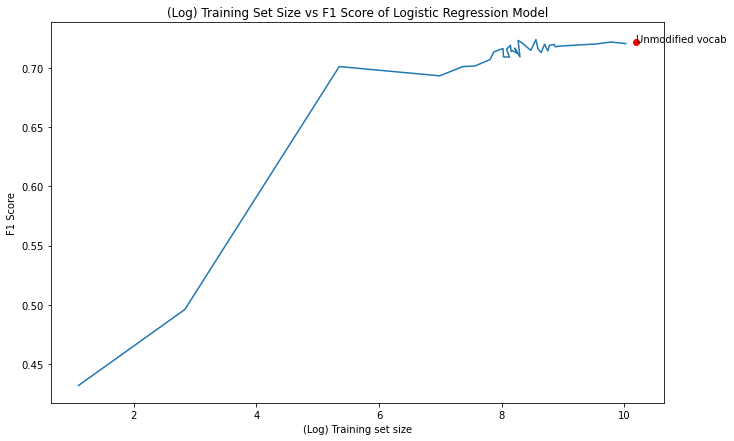

Logistic Regression Model Original Vocabulary Size (original vocab, no preprocessing):
	22547
Logistic Regression Model F1 Score (original vocab, no preprocessing): 
	0.7205201051911918




In [20]:
def P6():
#     Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ## STUDENT START ###
    
    import pandas as pd
    
    L1 = [0.001, 0.01,0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,20,23,25,30,35,40,45,50,55,60,70, 80,100,200,300,500]
    L2_scores = []
    vocab_size = []
    
    for i in range(len(L1)):
        # create/fit L1 logistic regression model
        vectorizer = CountVectorizer()
        vectorizer.fit(train_data)

        train_matrix = vectorizer.transform(train_data)
        dev_matrix = vectorizer.transform(dev_data)

        logr = LogisticRegression(C=L1[i], solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
        logr.fit(train_matrix, train_labels)
        pred = logr.predict(dev_matrix)

        vocab_length = len(vectorizer.get_feature_names())
        score = metrics.f1_score(pred, dev_labels, average="weighted")

        # create reduced vocabulary using non-zero-weighted features from L1 model
        coefs = logr.coef_
        labels = ['atheism','graphics','space','religion']

        df = pd.DataFrame(coefs).T


        df.index = vectorizer.get_feature_names()
        df.columns = labels


        df_nonzeroes = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]
        df_zeroes = df[~(df.T != 0).any()]

        nonzeroes = list(df_nonzeroes.index.values.tolist())

        nonzeroes_k = []
        for j in range(len(nonzeroes)):
            nonzeroes_k.append(j)
        nonzeroes_dict = dict(zip(nonzeroes, nonzeroes_k))

        # use reduced vocabulary to create L2 logistic regression model

        vectorizer = CountVectorizer(vocabulary=nonzeroes_dict)
        vectorizer.fit(train_data)

        train_matrix = vectorizer.transform(train_data)
        dev_matrix = vectorizer.transform(dev_data)

        logr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty = "l2")
        logr.fit(train_matrix, train_labels)
        pred = logr.predict(dev_matrix)

        vocab_length = len(vectorizer.get_feature_names())
        score = metrics.f1_score(pred, dev_labels, average="weighted")

        L2_scores.append(score)
        vocab_size.append(len(nonzeroes_dict))
        
        print('L1 regularization value: '+str(L1[i]))
        print('\t Vocab size: '+str(len(nonzeroes_dict)))
        print('\t F1 score of L2 Logistic Regression model: ' + str(score))
        print()

    # using original unmodified vocab for L2 model
    vectorizer = CountVectorizer()
    vectorizer.fit(train_data)

    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)

    logr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty = "l2")
    logr.fit(train_matrix, train_labels)
    pred = logr.predict(dev_matrix)
    
    orig_vocab_length = len(vectorizer.get_feature_names())
    orig_score = metrics.f1_score(pred, dev_labels, average="weighted")
    
    # plotting results 
    fig, ax = plt.subplots(figsize=(11,7))
    ax.plot(np.log(vocab_size), L2_scores)
    ax.plot(np.log(orig_vocab_length), orig_score, 'ro')
    ax.annotate('Unmodified vocab', xy=(np.log(orig_vocab_length), orig_score))
    ax.set_xlabel('(Log) Training set size')
    ax.set_ylabel('F1 Score')
    ax.set_title('(Log) Training Set Size vs F1 Score of Logistic Regression Model')
    plt.show()
    
    
    
    print('Logistic Regression Model Original Vocabulary Size (original vocab, no preprocessing):')
    print('\t' + str(vocab_length))
    print('Logistic Regression Model F1 Score (original vocab, no preprocessing): ')
    print('\t' + str(score))
    print()
    print()
    

    ## STUDENT END ###

P6()

ANSWER: F1 score increases as (log) training set size increases but eventuslly plateaus at about 0.7.  This means we can significantly reduce vocabulary and maintain a similar accuracy to the model that uses the unmodified vocabulary, which has an F1 score of ~0.72.  The performance of the models based on reduced vocabularies of log size 5 and greater compare similarly to that of the model based on the full vocabulary.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [23]:
def P7():
    ## STUDENT START ###
    
    vectorizer = TfidfVectorizer()
    vectorizer.fit(train_data)
    train_matrix = vectorizer.transform(train_data)
    dev_matrix = vectorizer.transform(dev_data)


    logr = LogisticRegression(penalty='l2', C=100, solver="liblinear", multi_class="auto")
    logr.fit(train_matrix, train_labels)
    logr.fit(train_matrix, train_labels)
    predicted = logr.predict(train_matrix)
    pred_dev = logr.predict(dev_matrix)
    score_processed = metrics.f1_score(pred_dev, dev_labels, average="weighted")
    print("TfidVectorizer L2 model score: " + str(score_processed))
    print()
    print()
    
    
    # find top 3 docs with the highest R ratio
    maxprobi = []
    besti = []
    bestr = []
    pred = []
    corr = []

    pred_prob = logr.predict_proba(dev_matrix)
    highest_r = 0
    highest_r_i = 0

    categories.sort()

    for c in range(len([1,2,3])):
        for i in range(pred_prob.shape[0]):
            maxprob = max(pred_prob[i])
            pred_ind = np.argmax(pred_prob[i])
            pred_lab = categories[pred_ind]
            
            correctprob = pred_prob[i][dev_labels[i]]
            corr_lab = categories[dev_labels[i]]
            
            if correctprob > 0 and maxprob >0:
                r = maxprob/correctprob
                if len(besti)==0:
                    if r>highest_r:
                        highest_r = r
                        highest_r_i = i
                        realcorr_lab = corr_lab
                        realpred_lab = pred_lab
                if len(besti)>0:
                    if r>highest_r:
                        if i not in besti:
                            highest_r = r
                            highest_r_i = i
                            realcorr_lab = corr_lab
                            realpred_lab = pred_lab
        besti.append(highest_r_i)
        bestr.append(highest_r)
        corr.append(realcorr_lab)
        pred.append(realpred_lab)
        
            
        highest_r = 0
        highest_r_i = 0


    print("3 documents with highest R ratio:")
    print()
    v = ["atheism", "graphics", "space", "religion"]
    for i in range(len(besti)):
        print("R ratio of document" + str(i+1) + ": " + str(bestr[i]))
        print("Predicted label: "+ str(pred[i]))
        print("Correct label: "+ str(corr[i]))
        print("Text of document "+ str(i+1) + ":")
        print()
        print(dev_data[besti[i]])
        print()
        print()
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print()
        print()
                
    
    ## STUDENT END ###

P7()

TfidVectorizer L2 model score: 0.7668609761496009


3 documents with highest R ratio:

R ratio of document1: 929.3580483725226
Predicted label: comp.graphics
Correct label: talk.religion.misc
Text of document 1:

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy c

ANSWER: 

TfidfVectorizer differs from CountVectorizer in how it values wordcount.  While CountVectorizer simply counts word frequencies, TfidfVectorizer takes into account the frequencies of the occurrences of words in the dictionary.  This inverse-frequency weighting helps counterbalance the high frequency of words across the entirety of the data.

The R ratio describes the distance between the probability of the correct label and the probability of the predicted label (the greatest probability).  If the two probabilities are equal (R ratio = 1), it means the model will have correctly predicted the label.  If the two probabilities are far apart (high R ratio), it means the model was very wrong in its prediction (very certain of the wrong label).

The model misclassifies document 1 as comp.graphics instead of talk.religion.misc because there are a lot of references in the document to computer/graphics terminology (RTF, ETR BOM, ASCII, LaTeX).  Similarly, the model  misclassifies document 2 as comp.graphics instead of talk.religion.misc because there are a lot of references in the document to computer/graphics terminology (ftp site, online, internet).

The model misclassifies document 3 as talk.religion.misc instead of alt.atheism because there aren't many strong identifiers - when I read it, I'm not able to really classify it either.

Documents 2 and 3 are shorter, which means there's less words for the model to work with.

One way to improve the model could be to significantly increase the weight of words that usually only appear in one category (i.e. Mormon) and significantly decrease the weight of words that often appear in multiple categories (i.e. online, site, email).



### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.